In [93]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
plt.style.use('figs.mplstyle')

In [74]:
paperOverWood50 = pd.read_csv('data/papel_madera_50.csv')
paperOverPaper50 = pd.read_csv('data/papel_papel_50.csv')
paperOverPaper100 = pd.read_csv('data/papel_papel_100.csv')
paperOverPaper150 = pd.read_csv('data/papel_papel_150.csv')
plasticOverWood50 = pd.read_csv('data/plastico_madera_50.csv')
plasticOverWood100 = pd.read_csv('data/plastico_madera_100.csv')
plasticOverWood150 = pd.read_csv('data/plastico_madera_150.csv')
plasticOverWood200 = pd.read_csv('data/plastico_madera_200.csv')
plasticOverPaper50 = pd.read_csv('data/plastico_papel_50.csv')
plasticOverPaper100 = pd.read_csv('data/plastico_papel_100.csv')
plasticOverPaper150 = pd.read_csv('data/plastico_papel_150.csv')

# mm to m and ms to s
paperOverWood50 *= 1e-3
paperOverPaper50 *= 1e-3
paperOverPaper100 *= 1e-3
paperOverPaper150 *= 1e-3
plasticOverWood50 *= 1e-3
plasticOverWood100 *= 1e-3
plasticOverWood150 *= 1e-3
plasticOverWood200 *= 1e-3
plasticOverPaper50 *= 1e-3
plasticOverPaper100 *= 1e-3
plasticOverPaper150 *= 1e-3

woodenMass = 6.0 * 1e-3
aluminiumMass = 22.0 * 1e-3
bronzeMass = 72.0 * 1e-3
sled = 110.0 * 1e-3

ddotX = lambda m1, m2, g, dynamicMu: g * (m2 - dynamicMu * m1) / (m1 + m2)
x = lambda t, m1, m2, g, dynamicMu: 0.5 * t**2 * ddotX(m1, m2, g, dynamicMu)

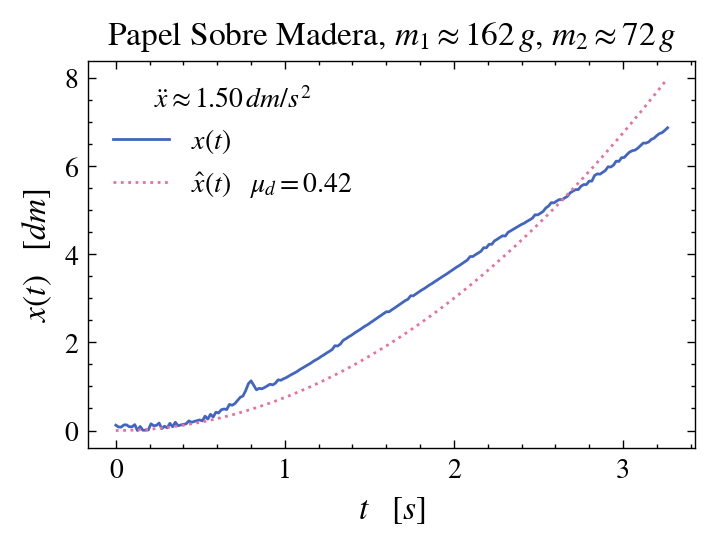

In [105]:
m1 = sled + 5 * woodenMass + aluminiumMass
m2 = bronzeMass

dynamicMu = sp.optimize.curve_fit(lambda t, dynamicMu: x(t, m1, m2, sp.constants.g, dynamicMu), paperOverWood50['t'], paperOverWood50['x'])[0][0]

plt.plot(paperOverWood50['t'], paperOverWood50['x']*1e1, label=f'$x(t)$')
plt.plot(paperOverWood50['t'], x(paperOverWood50['t'], m1, m2, sp.constants.g, dynamicMu)*1e1, label=f'$\hat{{x}}(t) \quad \\mu_d = {dynamicMu:.2f}$')
plt.xlabel('$t \\quad [s]$')
plt.ylabel('$x(t) \\quad [dm]$')
plt.legend(title=f'$\ddot{{x}} \\approx {ddotX(m1, m2, sp.constants.g, dynamicMu)*1e1:.2f} \\, dm/s^2$')
plt.title(f'Papel Sobre Madera, $m_1 \\approx {m1*1e3:.0f} \\, g$, $m_2 \\approx {m2*1e3:.0f} \\, g$')
plt.show()

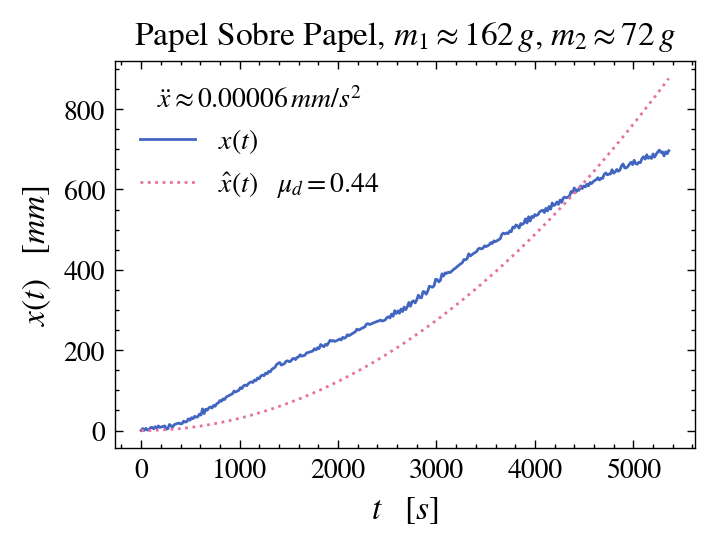

In [66]:
m1 = sled + 5 * woodenMass + aluminiumMass
m2 = bronzeMass

dynamicMu = sp.optimize.curve_fit(lambda t, dynamicMu: x(t, m1, m2, sp.constants.g, dynamicMu), paperOverPaper50['t'], paperOverPaper50['x'])[0][0]

plt.plot(paperOverPaper50['t'], paperOverPaper50['x']*1e3, label=f'$x(t)$')
plt.plot(paperOverPaper50['t'], x(paperOverPaper50['t'], m1, m2, sp.constants.g, dynamicMu)*1e3, label=f'$\hat{{x}}(t) \quad \\mu_d = {dynamicMu:.2f}$')
plt.xlabel('$t \\quad [s]$')
plt.ylabel('$x(t) \\quad [mm]$')
plt.legend(title=f'$\ddot{{x}} \\approx {ddotX(m1, m2, sp.constants.g, dynamicMu) * 1e3:.5f} \\, mm/s^2$')
plt.title(f'Papel Sobre Papel, $m_1 \\approx {m1*1e3:.0f} \\, g$, $m_2 \\approx {m2*1e3:.0f} \\, g$')
plt.show()

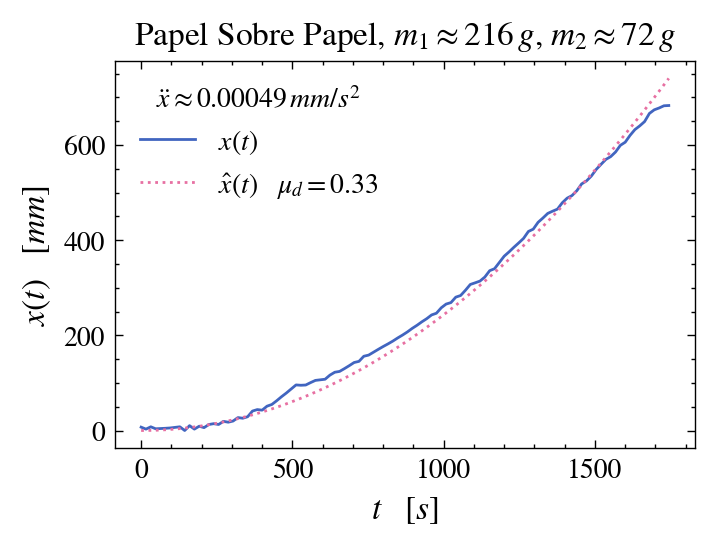

In [67]:
m1 = sled + 3 * woodenMass + 4 * aluminiumMass
m2 = bronzeMass

dynamicMu = sp.optimize.curve_fit(lambda t, dynamicMu: x(t, m1, m2, sp.constants.g, dynamicMu), paperOverPaper100['t'], paperOverPaper100['x'])[0][0]

plt.plot(paperOverPaper100['t'], paperOverPaper100['x']*1e3, label=f'$x(t)$')
plt.plot(paperOverPaper100['t'], x(paperOverPaper100['t'], m1, m2, sp.constants.g, dynamicMu)*1e3, label=f'$\hat{{x}}(t) \quad \\mu_d = {dynamicMu:.2f}$')
plt.xlabel('$t \\quad [s]$')
plt.ylabel('$x(t) \\quad [mm]$')
plt.legend(title=f'$\ddot{{x}} \\approx {ddotX(m1, m2, sp.constants.g, dynamicMu) * 1e3:.5f} \\, mm/s^2$')
plt.title(f'Papel Sobre Papel, $m_1 \\approx {m1*1e3:.0f} \\, g$, $m_2 \\approx {m2*1e3:.0f} \\, g$')
plt.show()

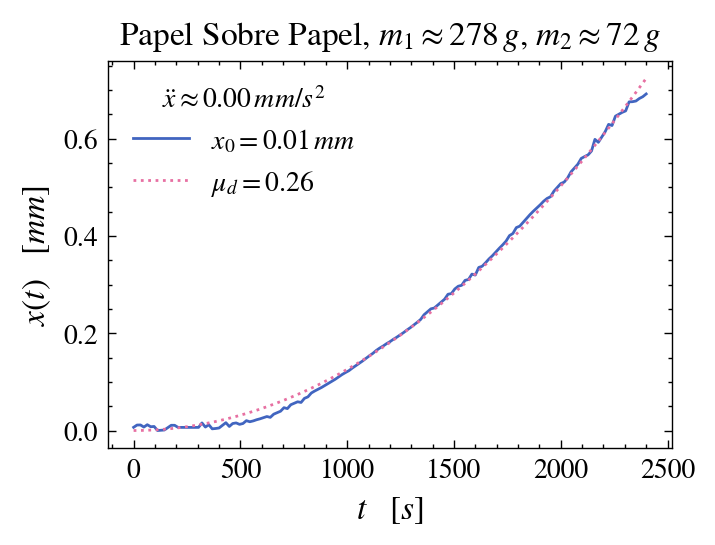

In [44]:
m1 = sled + 5 * woodenMass + 3 * aluminiumMass + bronzeMass
m2 = bronzeMass

dynamicMu = sp.optimize.curve_fit(lambda t, dynamicMu: x(t, m1, m2, sp.constants.g, dynamicMu), paperOverPaper150['t'], paperOverPaper150['x'])[0][0]

plt.plot(paperOverPaper150['t'], paperOverPaper150['x'], label=f'$x_0 = {paperOverPaper150["x"][0]:.2f} \\, mm$')
plt.plot(paperOverPaper150['t'], x(paperOverPaper150['t'], m1, m2, sp.constants.g, dynamicMu), label=f'$\\mu_d = {dynamicMu:.2f}$')
plt.xlabel('$t \\quad [s]$')
plt.ylabel('$x(t) \\quad [mm]$')
plt.legend(title=f'$\ddot{{x}} \\approx {ddotX(m1, m2, sp.constants.g, dynamicMu) * 1e3:.2f} \\, mm/s^2$')
plt.title(f'Papel Sobre Papel, $m_1 \\approx {m1 * 1e3:.0f} \\, g$, $m_2 \\approx {m2 * 1e3:.0f} \\, g$')
plt.show()

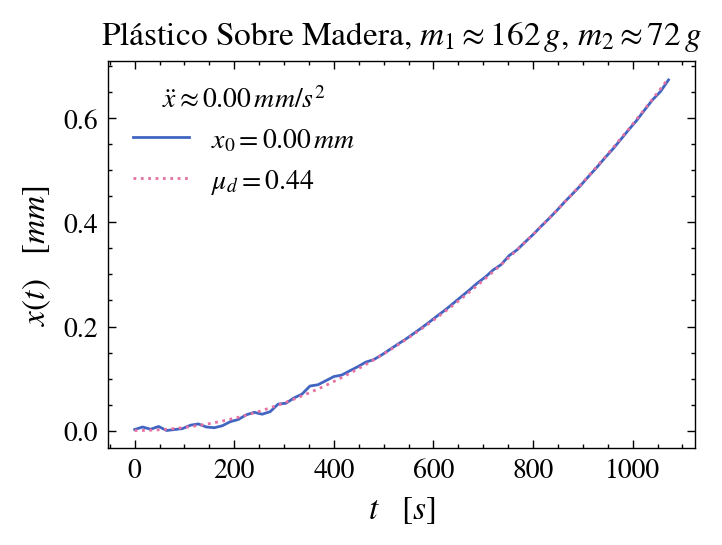

In [45]:
m1 = sled + 5 * woodenMass + aluminiumMass
m2 = bronzeMass

dynamicMu = sp.optimize.curve_fit(lambda t, dynamicMu: x(t, m1, m2, sp.constants.g, dynamicMu), plasticOverWood50['t'], plasticOverWood50['x'])[0][0]

plt.plot(plasticOverWood50['t'], plasticOverWood50['x'], label=f'$x_0 = {plasticOverWood50["x"][0]:.2f} \\, mm$')
plt.plot(plasticOverWood50['t'], x(plasticOverWood50['t'], m1, m2, sp.constants.g, dynamicMu), label=f'$\\mu_d = {dynamicMu:.2f}$')
plt.xlabel('$t \\quad [s]$')
plt.ylabel('$x(t) \\quad [mm]$')
plt.legend(title=f'$\ddot{{x}} \\approx {ddotX(m1, m2, sp.constants.g, dynamicMu) * 1e3:.2f} \\, mm/s^2$')
plt.title(f'Plástico Sobre Madera, $m_1 \\approx {m1 * 1e3:.0f} \\, g$, $m_2 \\approx {m2 * 1e3:.0f} \\, g$')
plt.show()

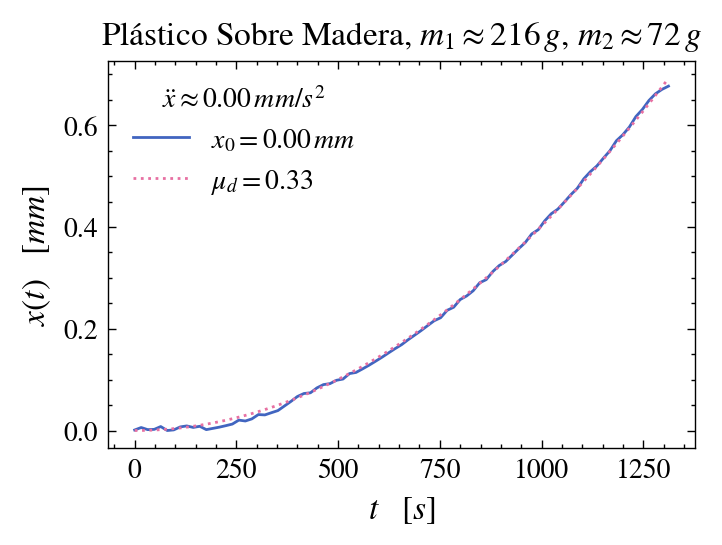

In [46]:
m1 = sled + 3 * woodenMass + 4 * aluminiumMass
m2 = bronzeMass

dynamicMu = sp.optimize.curve_fit(lambda t, dynamicMu: x(t, m1, m2, sp.constants.g, dynamicMu), plasticOverWood100['t'], plasticOverWood100['x'])[0][0]

plt.plot(plasticOverWood100['t'], plasticOverWood100['x'], label=f'$x_0 = {plasticOverWood100["x"][0]:.2f} \\, mm$')
plt.plot(plasticOverWood100['t'], x(plasticOverWood100['t'], m1, m2, sp.constants.g, dynamicMu), label=f'$\\mu_d = {dynamicMu:.2f}$')
plt.xlabel('$t \\quad [s]$')
plt.ylabel('$x(t) \\quad [mm]$')
plt.legend(title=f'$\ddot{{x}} \\approx {ddotX(m1, m2, sp.constants.g, dynamicMu) * 1e3:.2f} \\, mm/s^2$')
plt.title(f'Plástico Sobre Madera, $m_1 \\approx {m1 * 1e3:.0f} \\, g$, $m_2 \\approx {m2 * 1e3:.0f} \\, g$')
plt.show()

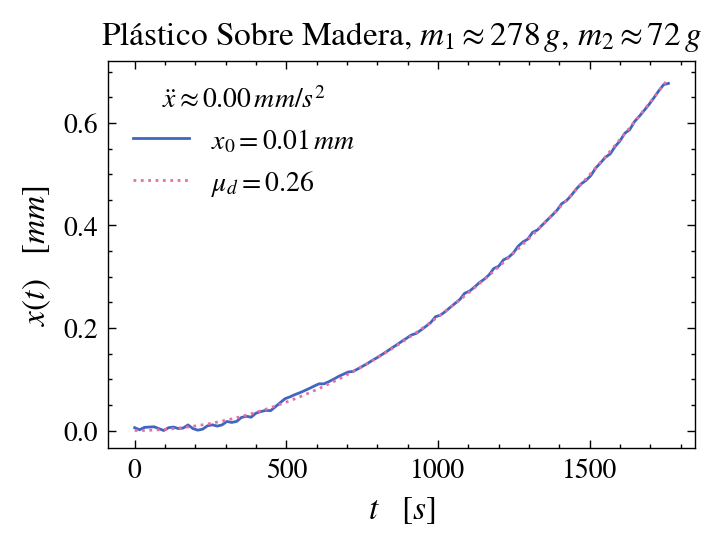

In [47]:
m1 = sled + 5 * woodenMass + 3 * aluminiumMass + bronzeMass
m2 = bronzeMass

dynamicMu = sp.optimize.curve_fit(lambda t, dynamicMu: x(t, m1, m2, sp.constants.g, dynamicMu), plasticOverWood150['t'], plasticOverWood150['x'])[0][0]

plt.plot(plasticOverWood150['t'], plasticOverWood150['x'], label=f'$x_0 = {plasticOverWood150["x"][0]:.2f} \\, mm$')
plt.plot(plasticOverWood150['t'], x(plasticOverWood150['t'], m1, m2, sp.constants.g, dynamicMu), label=f'$\\mu_d = {dynamicMu:.2f}$')
plt.xlabel('$t \\quad [s]$')
plt.ylabel('$x(t) \\quad [mm]$')
plt.legend(title=f'$\ddot{{x}} \\approx {ddotX(m1, m2, sp.constants.g, dynamicMu) * 1e3:.2f} \\, mm/s^2$')
plt.title(f'Plástico Sobre Madera, $m_1 \\approx {m1 * 1e3:.0f} \\, g$, $m_2 \\approx {m2 * 1e3:.0f} \\, g$')
plt.show()

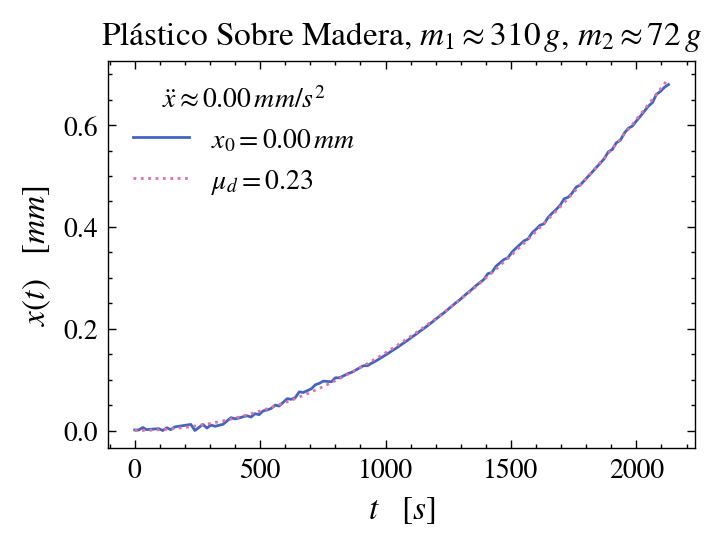

In [48]:
m1 = sled + 2 * woodenMass + 2 * aluminiumMass + 2 * bronzeMass
m2 = bronzeMass

dynamicMu = sp.optimize.curve_fit(lambda t, dynamicMu: x(t, m1, m2, sp.constants.g, dynamicMu), plasticOverWood200['t'], plasticOverWood200['x'])[0][0]

plt.plot(plasticOverWood200['t'], plasticOverWood200['x'], label=f'$x_0 = {plasticOverWood200["x"][0]:.2f} \\, mm$')
plt.plot(plasticOverWood200['t'], x(plasticOverWood200['t'], m1, m2, sp.constants.g, dynamicMu), label=f'$\\mu_d = {dynamicMu:.2f}$')
plt.xlabel('$t \\quad [s]$')
plt.ylabel('$x(t) \\quad [mm]$')
plt.legend(title=f'$\ddot{{x}} \\approx {ddotX(m1, m2, sp.constants.g, dynamicMu) * 1e3:.2f} \\, mm/s^2$')
plt.title(f'Plástico Sobre Madera, $m_1 \\approx {m1 * 1e3:.0f} \\, g$, $m_2 \\approx {m2 * 1e3:.0f} \\, g$')
plt.show()

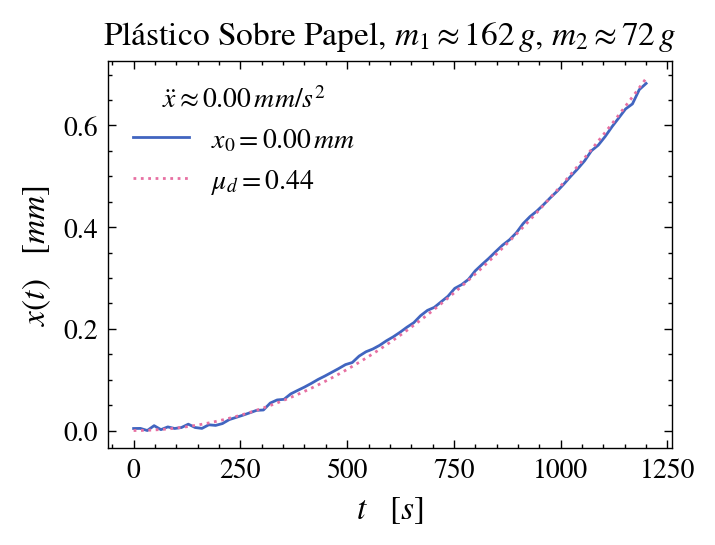

In [49]:
m1 = sled + 5 * woodenMass + aluminiumMass
m2 = bronzeMass

dynamicMu = sp.optimize.curve_fit(lambda t, dynamicMu: x(t, m1, m2, sp.constants.g, dynamicMu), plasticOverPaper50['t'], plasticOverPaper50['x'])[0][0]

plt.plot(plasticOverPaper50['t'], plasticOverPaper50['x'], label=f'$x_0 = {plasticOverPaper50["x"][0]:.2f} \\, mm$')
plt.plot(plasticOverPaper50['t'], x(plasticOverPaper50['t'], m1, m2, sp.constants.g, dynamicMu), label=f'$\\mu_d = {dynamicMu:.2f}$')
plt.xlabel('$t \\quad [s]$')
plt.ylabel('$x(t) \\quad [mm]$')
plt.legend(title=f'$\ddot{{x}} \\approx {ddotX(m1, m2, sp.constants.g, dynamicMu) * 1e3:.2f} \\, mm/s^2$')
plt.title(f'Plástico Sobre Papel, $m_1 \\approx {m1 * 1e3:.0f} \\, g$, $m_2 \\approx {m2 * 1e3:.0f} \\, g$')
plt.show()

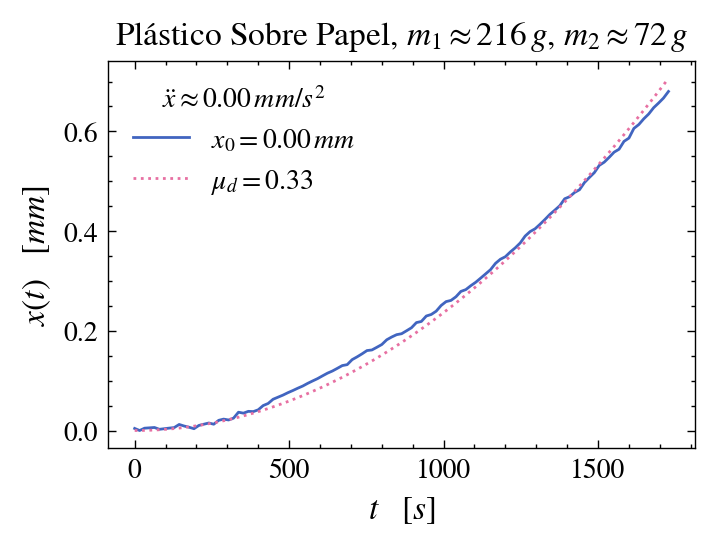

In [50]:
m1 = sled + 3 * woodenMass + 4 * aluminiumMass
m2 = bronzeMass

dynamicMu = sp.optimize.curve_fit(lambda t, dynamicMu: x(t, m1, m2, sp.constants.g, dynamicMu), plasticOverPaper100['t'], plasticOverPaper100['x'])[0][0]

plt.plot(plasticOverPaper100['t'], plasticOverPaper100['x'], label=f'$x_0 = {plasticOverPaper100["x"][0]:.2f} \\, mm$')
plt.plot(plasticOverPaper100['t'], x(plasticOverPaper100['t'], m1, m2, sp.constants.g, dynamicMu), label=f'$\\mu_d = {dynamicMu:.2f}$')
plt.xlabel('$t \\quad [s]$')
plt.ylabel('$x(t) \\quad [mm]$')
plt.legend(title=f'$\ddot{{x}} \\approx {ddotX(m1, m2, sp.constants.g, dynamicMu) * 1e3:.2f} \\, mm/s^2$')
plt.title(f'Plástico Sobre Papel, $m_1 \\approx {m1 * 1e3:.0f} \\, g$, $m_2 \\approx {m2 * 1e3:.0f} \\, g$')
plt.show()

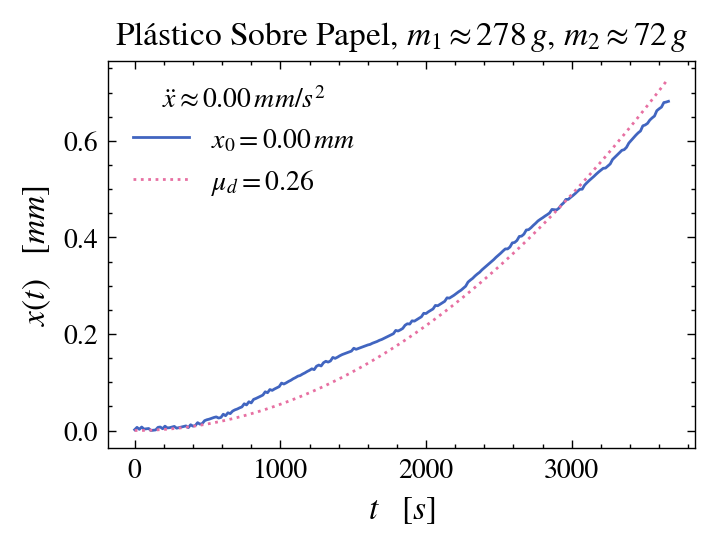

In [51]:
m1 = sled + 5 * woodenMass + 3 * aluminiumMass + bronzeMass
m2 = bronzeMass

dynamicMu = sp.optimize.curve_fit(lambda t, dynamicMu: x(t, m1, m2, sp.constants.g, dynamicMu), plasticOverPaper150['t'], plasticOverPaper150['x'])[0][0]

plt.plot(plasticOverPaper150['t'], plasticOverPaper150['x'], label=f'$x_0 = {plasticOverPaper150["x"][0]:.2f} \\, mm$')
plt.plot(plasticOverPaper150['t'], x(plasticOverPaper150['t'], m1, m2, sp.constants.g, dynamicMu), label=f'$\\mu_d = {dynamicMu:.2f}$')
plt.xlabel('$t \\quad [s]$')
plt.ylabel('$x(t) \\quad [mm]$')
plt.legend(title=f'$\ddot{{x}} \\approx {ddotX(m1, m2, sp.constants.g, dynamicMu) * 1e3:.2f} \\, mm/s^2$')
plt.title(f'Plástico Sobre Papel, $m_1 \\approx {m1 * 1e3:.0f} \\, g$, $m_2 \\approx {m2 * 1e3:.0f} \\, g$')
plt.show()